## Little training monitor

Tails a `lighting_logs/version_X` directory for train/val loss.

In [173]:
# %pip install datasets transformers zstandard matplotlib
import torch
import text_data
import conv_text
import numpy as np
import pandas as pd


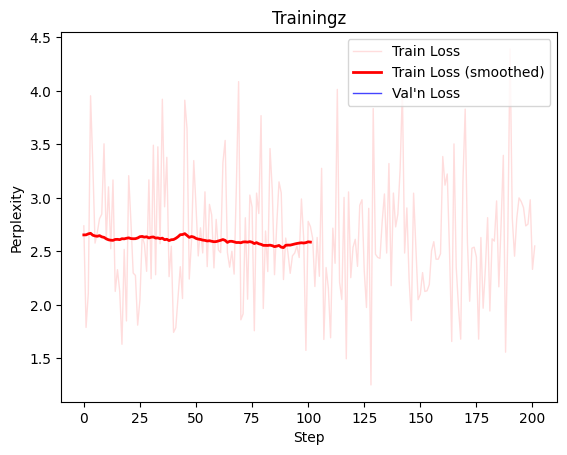

In [266]:
tdat = pd.read_csv('lightning_logs/version_3/metrics.csv')
train = tdat.train_loss[~np.isnan(tdat.train_loss)]

xspace = np.linspace(0, len(train), len(train))
fsz = max(100, len(train)//20)
filter = np.ones(fsz)/fsz
# filter =  np.linspace(0.25, 1.75, num=fsz)/fsz

import matplotlib.pyplot as plt

plt.plot( train, label = 'Train Loss', color='#fdd', linewidth=1)
plt.plot( np.convolve(train, filter, mode='valid'), label = 'Train Loss (smoothed)', color='r', linewidth=2)
if 'val_loss' in tdat.columns:
    val = tdat.val_loss[~np.isnan(tdat.val_loss)]
    plt.plot( val, label = 'Val\'n Loss', color='#44f', linewidth=1)

plt.xlabel('Step')
plt.ylabel('Perplexity')
plt.legend(loc='upper right')
plt.title('Trainingz')
plt.show()


In [267]:
np.mean(tdat.train_loss[-100:])


2.585644159654174

In [268]:
tdat.val_loss[~np.isnan(tdat.val_loss)]

148    2.556243
Name: val_loss, dtype: float64

In [188]:
tdat[-100:]

,train_loss,length,epoch,step,val_loss
84,3.517530,23.0,0,8499,NaN
85,4.004392,25.0,0,8599,NaN
86,2.602804,24.0,0,8699,NaN
87,3.761379,15.0,0,8799,NaN
88,3.651949,18.0,0,8899,NaN
...,...,...,...,...,...
179,3.343727,22.0,0,17899,NaN
180,3.205732,15.0,0,17999,NaN
181,2.847646,31.0,0,18099,NaN
182,1.722679,39.0,0,18199,NaN


In [190]:
np.mean(tdat.length)

26.811289093257244